Simple linear regression is a statistical method used to model the relationship between two continuous variables, often referred to as the predictor variable (independent variable) and the response variable (dependent variable).

In [3]:
# Problem: Advertising sales channel prediction data: 
# Predicts sales based on the money spent on different platforms for marketing.

# Target variable - Sales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


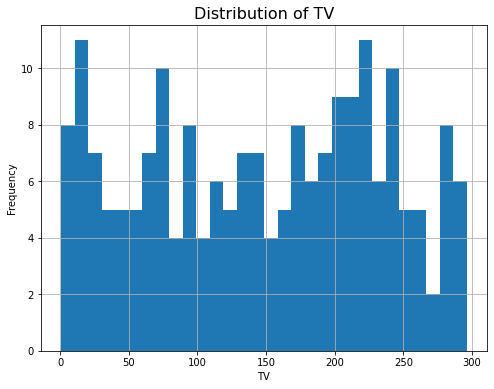

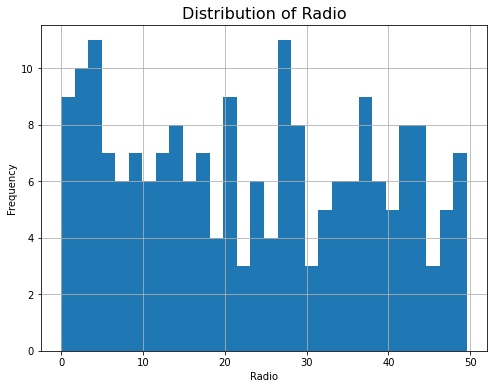

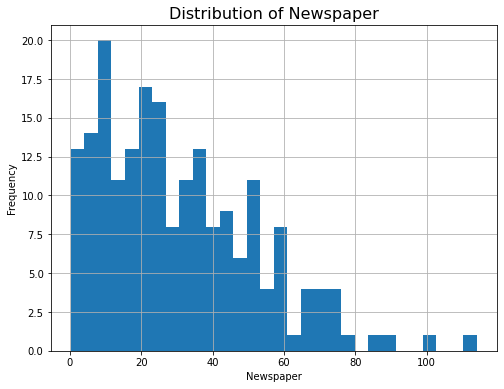

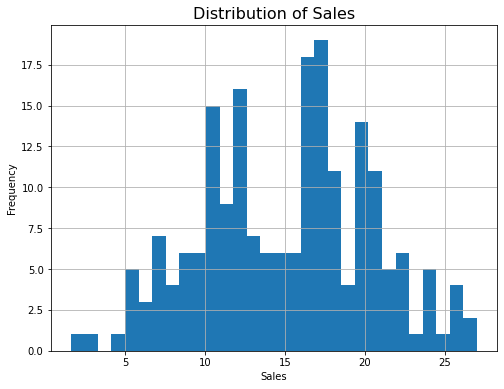

In [10]:
#Look at the data distribution
for column in df.columns:
        x = df[column]
        plt.figure(figsize=(8, 6))
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.hist(x, bins=30)
        plt.grid(True)
        plt.show()

        
#Newspaper has outliers and data is skewed - Normalize the data

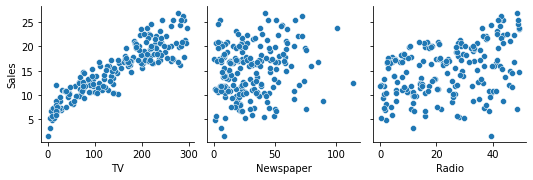

In [16]:
## Lets check the linear relationship between dependent and independent variables
import seaborn as sns
sns.pairplot(df, x_vars=[ 'TV', 'Newspaper','Radio' ], y_vars = 'Sales', kind = 'scatter' )
plt.show()

<Axes: >

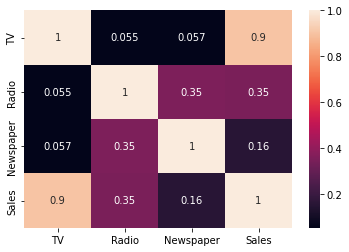

In [18]:
# correlation coefficient

sns.heatmap(df.corr(), annot=True)

# Dependent variables must not have high correlation - true
# Tv and sales(independet var) have high correlation as it has a linear relationship 
# Select tv as the feature to fit on

In [30]:
# train test split

from sklearn.model_selection import train_test_split

X = df['TV'].values
y = df['Sales'].values

# reshape to fit scikit learn expectation of 2-D array
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size =0.3, random_state=42)
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140, 1)
(60, 1)
(140,)
(60,)


In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression


# scikit-learn expects a 2D array with shape (n_samples, n_features)

model= LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [34]:
# Access model parameters
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.05483488]
Intercept: 7.206554548173251


In [35]:
# Make predictions
y_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [38]:
#Analysing performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
#R-squared value

print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  2.2758570698017597
R-squared:  0.8148553892086791



R-square (Coeff of determination)
- is a measure of how well the independent variables explain the variability of the dependent variable in a regression model. It ranges from 0 (doesn't explain well) to 1 (explains well), where:

eg. 81% of the variance in Sales is explained by Tv

RMSE:

- The Root Mean Squared Error (RMSE) is a measure of the average deviation of the predicted values from the observed values in a regression model. Lower values of RMSE indicate better model performance, as they reflect smaller deviations between the predicted and actual values.

statsmodels can also be used to build a model and get more statistical summary for the model like f-statistic etc. Not direclty avalable in scikit-learn


### References
1. https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/